## Hands-on Creta 02

### Find all Argo floats in an area

Example used during the in person training during the *[Euro-Argo Science Meeting](https://www.euro-argo.eu/News-Meetings/News/News-archives/2025/8th-Euro-Argo-Science-Meeting)* celebrated on 23-25 September 2025, in the [HCMR, Hellenic Centre for Marine Research](https://www.hcmr.gr/en/) premises in Crete, Greece




For this examples it is requires to have downloaded the full version of the Argo Global Data Assembly Centre (Argo GDAC) snapshot from september 2025 [DOI 10.17882/42182](https://www.seanoe.org/data/00311/42182/#121877)

First, import the libraries

In [3]:
import numpy as np
import netCDF4
import xarray as xr

import cartopy.crs as ccrs
import cartopy

import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib import pyplot as plt
%matplotlib inline

load all the platforms that transmited in august 2025

In [4]:
WMOs=np.array([])
DACs=np.array([])
LONs=np.array([])
LATs=np.array([])
for iday in range(1,31):
    filein=f"../../Data/202509-ArgoData/geo/atlantic_ocean/2025/08/202508{iday:02d}_prof.nc"
    DS=xr.open_dataset(filein)
    #look for the WMO and DAC for each float
    LONs=np.append(LONs,DS.LONGITUDE.values)
    LATs=np.append(LATs,DS.LATITUDE.values)
    DACs=np.append(DACs,DS.DATA_CENTRE.astype(str).values)
    WMOs=np.append(WMOs,DS.PLATFORM_NUMBER.astype(int).values)

#Keep just the unique set of WMOs
WMOs, indices = np.unique(WMOs, return_index=True)
DACs=DACs[indices]
LONs=LONs[indices]
LATs=LATs[indices]

In [5]:
print(f"In the Atlantic, during august 2025, {WMOs.shape[0]} Argo floats where active:")
for ip in range(0,WMOs.shape[0],100):
    print(f"{ip:03d} WMO {WMOs[ip]:7.0f} DAC {DACs[ip]} ...")

In the Atlantic, during august 2025, 1264 Argo floats where active:
000 WMO 1901814 DAC AO ...
100 WMO 1902404 DAC AO ...
200 WMO 1902790 DAC AO ...
300 WMO 3901686 DAC IF ...
400 WMO 3902590 DAC IF ...
500 WMO 4902574 DAC ME ...
600 WMO 4903268 DAC AO ...
700 WMO 4903634 DAC IF ...
800 WMO 5906488 DAC AO ...
900 WMO 6902895 DAC IF ...
1000 WMO 6903826 DAC IF ...
1100 WMO 6990557 DAC AO ...
1200 WMO 7901036 DAC IF ...


lets focus just around the eastern mediterranean:

In [6]:
indice=np.where((LATs>25) & (LATs<42) & (LONs<50) & (LONs>10))
WMOs_area=WMOs[indice]
DACs_area=DACs[indice]

In [7]:
print(f" {WMOs_area.shape[0]} Argo floats where active in the selected area:")
for ip in range(0,WMOs_area.shape[0],1):
    print(f"{ip:02d} WMO {WMOs_area[ip]:7.0f} DAC {DACs_area[ip]}")

 41 Argo floats where active in the selected area:
00 WMO 1902575 DAC IF
01 WMO 1902582 DAC IF
02 WMO 2903797 DAC IF
03 WMO 2903898 DAC IF
04 WMO 2903928 DAC IF
05 WMO 2904023 DAC IF
06 WMO 3902461 DAC IF
07 WMO 3902474 DAC IF
08 WMO 3902483 DAC IF
09 WMO 3902631 DAC IF
10 WMO 3902695 DAC IF
11 WMO 4903661 DAC IF
12 WMO 4903679 DAC IF
13 WMO 4903782 DAC IF
14 WMO 4903817 DAC IF
15 WMO 4903847 DAC IF
16 WMO 5906865 DAC IF
17 WMO 5906993 DAC IF
18 WMO 5907088 DAC IF
19 WMO 5907213 DAC IF
20 WMO 6903015 DAC IF
21 WMO 6903296 DAC IF
22 WMO 6903297 DAC IF
23 WMO 6903298 DAC IF
24 WMO 6903779 DAC IF
25 WMO 6903799 DAC IF
26 WMO 6903803 DAC IF
27 WMO 6903821 DAC IF
28 WMO 6903822 DAC IF
29 WMO 6903823 DAC IF
30 WMO 6903824 DAC IF
31 WMO 6903825 DAC IF
32 WMO 6903826 DAC IF
33 WMO 6903828 DAC IF
34 WMO 6990629 DAC IF
35 WMO 6990658 DAC IF
36 WMO 6990684 DAC IF
37 WMO 7901017 DAC IF
38 WMO 7901065 DAC IF
39 WMO 7901138 DAC IF
40 WMO 7902260 DAC IF


And plot the usurfacing position of all these floats:

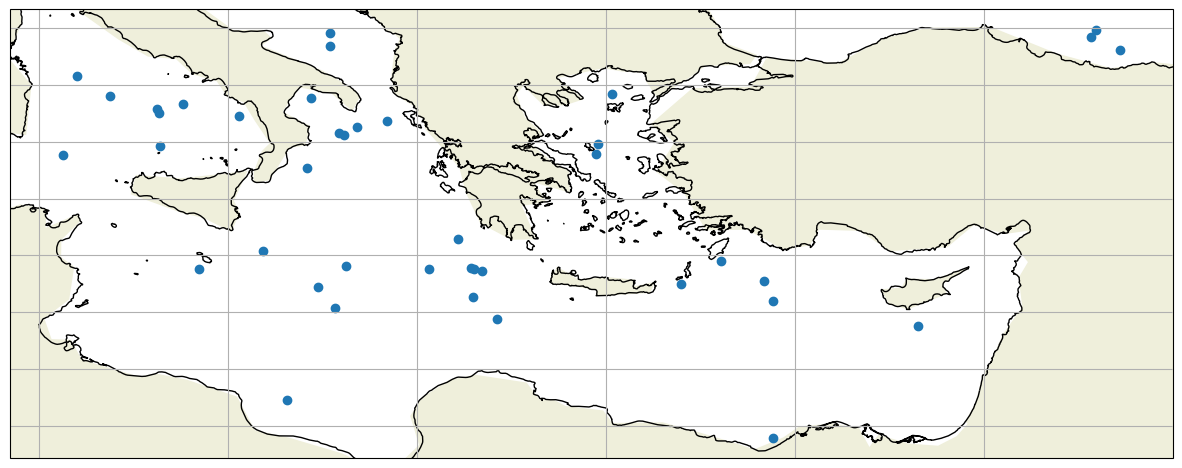

In [8]:
fig,ax = plt.subplots(figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()})

ax.plot(LONs[indice],LATs[indice],'o')

ax.coastlines()
ax.add_feature(cartopy.feature.LAND.with_scale('110m'))

ax.gridlines();
ax.grid()

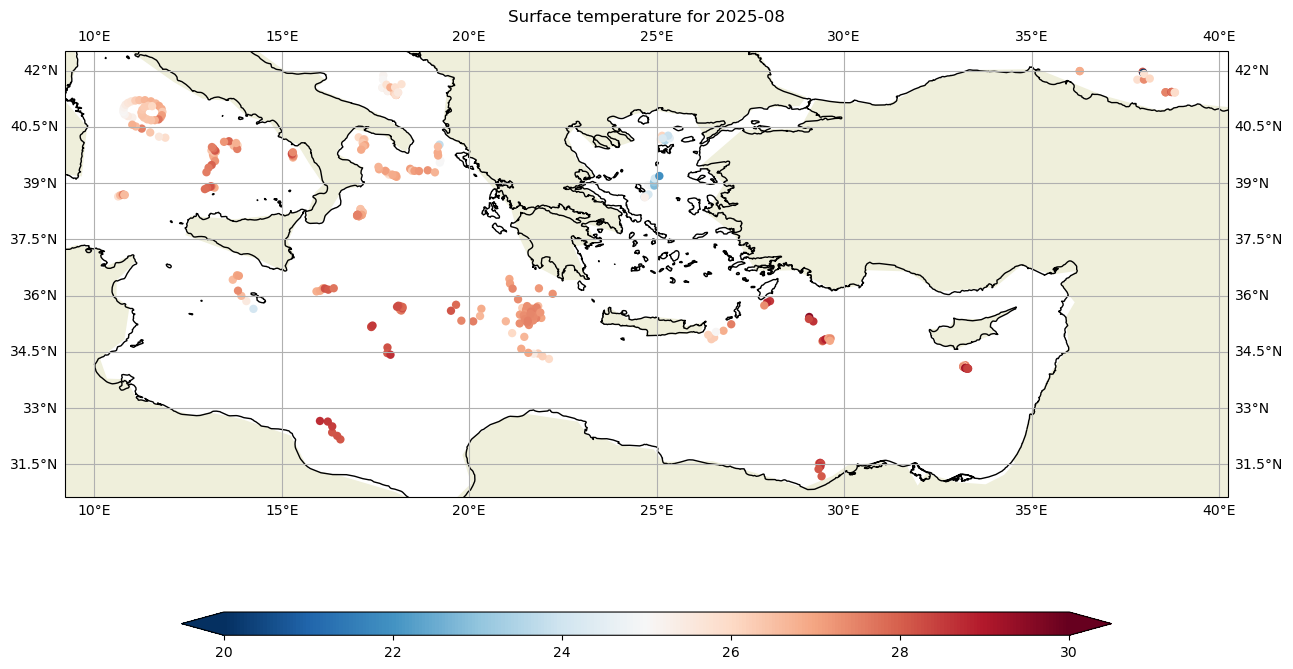

In [9]:
fig,ax = plt.subplots(figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()})

for basin in ['atlantic_ocean']:
    for iday in range(1,31):
        filein=f"../../Data/202509-ArgoData/geo/{basin}/2025/08/202508{iday:02d}_prof.nc"
        DS=xr.open_dataset(filein)
        lon=DS.LONGITUDE.values
        lat=DS.LATITUDE.values
        tempi=np.zeros(lon.shape[0])
        tempi.fill(np.nan)
        for ip in range(0,lon.shape[0]):
            tempi[ip]=np.interp(5,DS.PRES[ip,:],DS.TEMP[ip,:])
        indice=np.where((lat>25) & (lat<42) & (lon<50) & (lon>10))
        cs=ax.scatter(lon[indice],lat[indice],c=tempi[indice],cmap="RdBu_r",vmin=20, vmax=30, edgecolor='none')

ax.set_title(f"Surface temperature for {DS.JULD[0].values.astype('datetime64[M]')}")
ax.coastlines()
ax.add_feature(cartopy.feature.LAND.with_scale('110m'))

ax.gridlines(draw_labels=True);
ax.grid()

cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='horizontal',shrink=.8,aspect=40)

In [10]:
DACs_area=np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(DACs_area, 
                     'IF','coriolis'),'BO','bodc'),'AO','aoml'),
                     'HZ','csio'),'CS','csiro'),'IN','incois'),'JA','jma'),'KM','kma'),
                     'KO','kordi'),'ME','meds'),'NM','nmdis')

here ate the file names with the profiles

In [11]:
for ip in range(0,WMOs_area.size):
    filein=f"../../Data/202509-ArgoData/dac/{DACs_area[ip]}/{WMOs_area[ip]:7.0f}/{WMOs_area[ip]:7.0f}_prof.nc"
    #filein=f"{WMOs_area[ip]:7.0f}"
    print(filein)

../../Data/202509-ArgoData/dac/coriolis/1902575/1902575_prof.nc
../../Data/202509-ArgoData/dac/coriolis/1902582/1902582_prof.nc
../../Data/202509-ArgoData/dac/coriolis/2903797/2903797_prof.nc
../../Data/202509-ArgoData/dac/coriolis/2903898/2903898_prof.nc
../../Data/202509-ArgoData/dac/coriolis/2903928/2903928_prof.nc
../../Data/202509-ArgoData/dac/coriolis/2904023/2904023_prof.nc
../../Data/202509-ArgoData/dac/coriolis/3902461/3902461_prof.nc
../../Data/202509-ArgoData/dac/coriolis/3902474/3902474_prof.nc
../../Data/202509-ArgoData/dac/coriolis/3902483/3902483_prof.nc
../../Data/202509-ArgoData/dac/coriolis/3902631/3902631_prof.nc
../../Data/202509-ArgoData/dac/coriolis/3902695/3902695_prof.nc
../../Data/202509-ArgoData/dac/coriolis/4903661/4903661_prof.nc
../../Data/202509-ArgoData/dac/coriolis/4903679/4903679_prof.nc
../../Data/202509-ArgoData/dac/coriolis/4903782/4903782_prof.nc
../../Data/202509-ArgoData/dac/coriolis/4903817/4903817_prof.nc
../../Data/202509-ArgoData/dac/coriolis/

I can also look at the surface tempearture duing august:

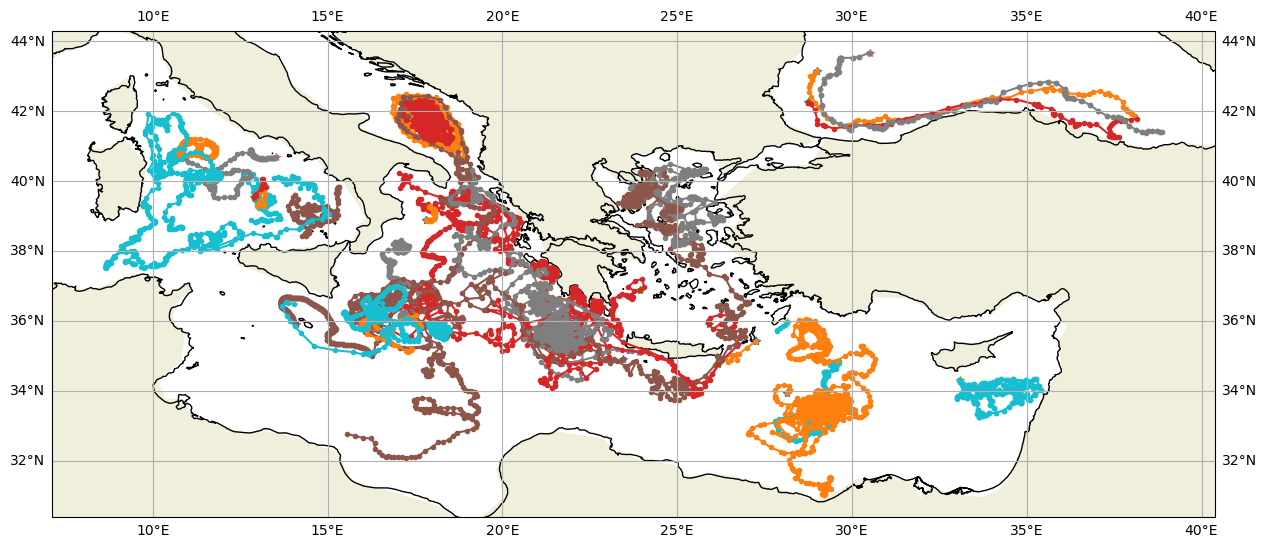

In [12]:
fig,ax = plt.subplots(figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()})

for ip in range(0,WMOs_area.size):
    filein=f"../../Data/202509-ArgoData/dac/{DACs_area[ip]}/{WMOs_area[ip]:7.0f}/{WMOs_area[ip]:7.0f}_prof.nc"
    DS=xr.open_dataset(filein)
    ax.plot(DS.LONGITUDE[0],DS.LATITUDE[0],'*',DS.LONGITUDE,DS.LATITUDE,'.-')

ax.coastlines()
ax.add_feature(cartopy.feature.LAND.with_scale('110m'))

ax.gridlines(draw_labels=True);
ax.grid()


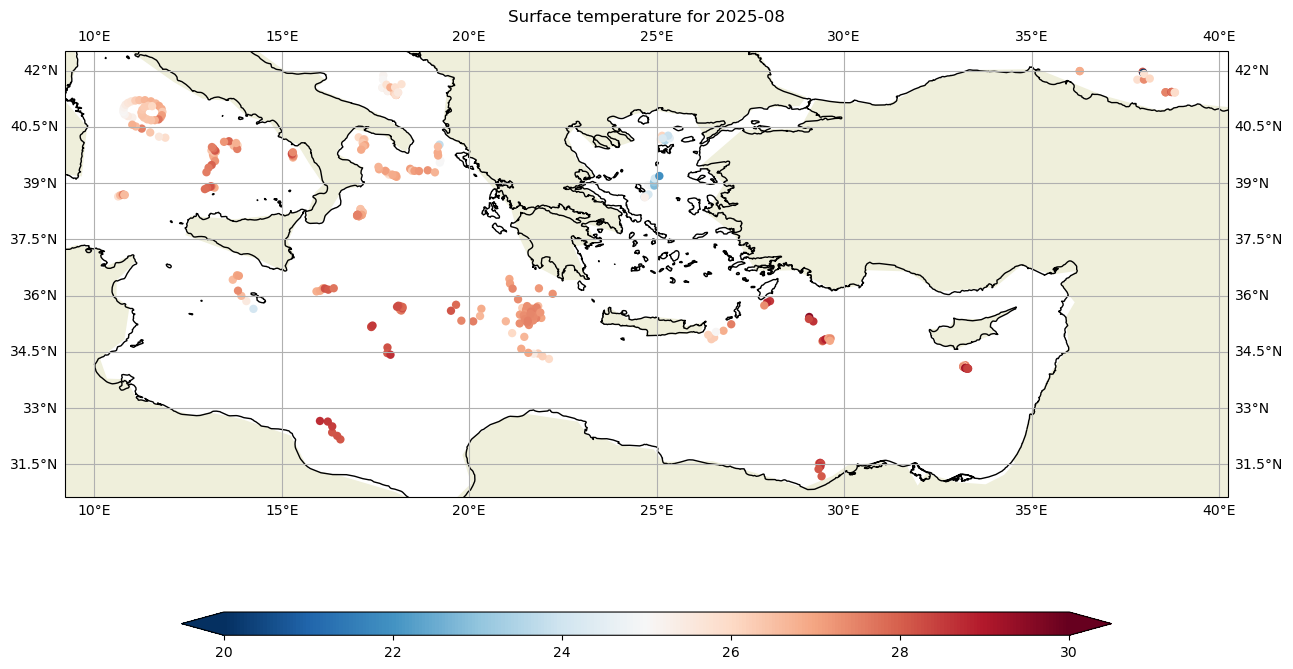

In [13]:
fig,ax = plt.subplots(figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()})

for basin in ['atlantic_ocean']:
    for iday in range(1,31):
        filein=f"../../Data/202509-ArgoData/geo/{basin}/2025/08/202508{iday:02d}_prof.nc"
        DS=xr.open_dataset(filein)
        lon=DS.LONGITUDE.values
        lat=DS.LATITUDE.values
        tempi=np.zeros(lon.shape[0])
        tempi.fill(np.nan)
        for ip in range(0,lon.shape[0]):
            tempi[ip]=np.interp(5,DS.PRES[ip,:],DS.TEMP[ip,:])
        indice=np.where((lat>25) & (lat<42) & (lon<50) & (lon>10))
        cs=ax.scatter(lon[indice],lat[indice],c=tempi[indice],cmap="RdBu_r",vmin=20, vmax=30, edgecolor='none')

ax.set_title(f"Surface temperature for {DS.JULD[0].values.astype('datetime64[M]')}")
ax.coastlines()
ax.add_feature(cartopy.feature.LAND.with_scale('110m'))

ax.gridlines(draw_labels=True);
ax.grid()

cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='horizontal',shrink=.8,aspect=40)